In [50]:
#Discovering the most sought-after skill among the top 3 data roles.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


# import dataset from a csv file and create a dataframe from it

df = pd.read_csv('C:\\Users\\aksha\\data_analysis_job_market\\dataset\\data_jobs.csv')

# data needs to be cleaned to have the right datatype inorder to perform relevant analysis
# convert the date of job postings into a date time object to be able to use the vaious date time attribute to perform further analysis

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['Month'] = df['job_posted_date'].dt.month
df['Month_name']= df['job_posted_date'].dt.month_name
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Month,Month_name
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,6,<bound method PandasDelegate._add_delegate_acc...
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1,<bound method PandasDelegate._add_delegate_acc...
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8,<bound method PandasDelegate._add_delegate_acc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",3,<bound method PandasDelegate._add_delegate_acc...
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",3,<bound method PandasDelegate._add_delegate_acc...
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",3,<bound method PandasDelegate._add_delegate_acc...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3,<bound method PandasDelegate._add_delegate_acc...


In [51]:
# Filtering data only for job postings from United states

df_US = df[df['job_country']=='United States'].copy()
df_US.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Month,Month_name
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,6,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",11,<bound method PandasDelegate._add_delegate_acc...
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",3,<bound method PandasDelegate._add_delegate_acc...
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",4,<bound method PandasDelegate._add_delegate_acc...


In [52]:
df_US.shape

(206292, 19)

In [53]:
# top 3 data jobs

df_US_datajobs = df_US[df_US['job_title_short'].str.contains('data',case=False,na=False)]

all_data_jobs = df_US_datajobs['job_title_short'].value_counts() 
all_data_jobs

job_title_short
Data Analyst             67816
Data Scientist           58830
Data Engineer            35080
Senior Data Scientist    12946
Senior Data Analyst      11791
Senior Data Engineer      9289
Name: count, dtype: int64

In [54]:
df_US_datajobs['job_skills'] = df_US_datajobs['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


C:\Users\aksha\AppData\Local\Temp\ipykernel_32000\3375450009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_datajobs['job_skills'] = df_US_datajobs['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


In [55]:
df_US_datajobs.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Month,Month_name
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,6,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '...",11,<bound method PandasDelegate._add_delegate_acc...
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",3,<bound method PandasDelegate._add_delegate_acc...
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",4,<bound method PandasDelegate._add_delegate_acc...


In [56]:
#The skills data are in a list. Let's explode them to have each skill mapped to the corresponding job title

df_US_datajobs_withskills= df_US_datajobs.explode('job_skills')
df_US_datajobs_withskills.head(20)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Month,Month_name
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,6,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,aws,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,tensorflow,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,keras,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,pytorch,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,<bound method PandasDelegate._add_delegate_acc...
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,python,"{'cloud': ['gcp'], 'programming': ['python', '...",11,<bound method PandasDelegate._add_delegate_acc...


In [57]:
df_skills_demand = df_US_datajobs_withskills['job_skills'].value_counts()
df_skills_demand    
                                                        

job_skills
sql           110319
python        104298
r              50007
tableau        46936
excel          41868
               ...  
ionic              1
gtx                1
mattermost         1
ocaml              1
fastify            1
Name: count, Length: 241, dtype: int64

In [58]:
df_skills_per_job = df_US_datajobs_withskills.groupby(['job_skills','job_title_short'])['job_skills'].count()
df_skills_per_job

job_skills  job_title_short      
airflow     Data Analyst              387
            Data Engineer            4716
            Data Scientist           1166
            Senior Data Analyst       136
            Senior Data Engineer     1784
                                     ... 
zoom        Data Engineer              95
            Data Scientist            161
            Senior Data Analyst        50
            Senior Data Engineer       30
            Senior Data Scientist      25
Name: job_skills, Length: 1228, dtype: int64

In [59]:
df_skills_per_job= df_skills_per_job.reset_index(name='skill_count')


In [60]:
df_skills_per_job

,job_skills,job_title_short,skill_count
0,airflow,Data Analyst,387
1,airflow,Data Engineer,4716
2,airflow,Data Scientist,1166
3,airflow,Senior Data Analyst,136
4,airflow,Senior Data Engineer,1784
...,...,...,...
1223,zoom,Data Engineer,95
1224,zoom,Data Scientist,161
1225,zoom,Senior Data Analyst,50
1226,zoom,Senior Data Engineer,30


In [ ]:
df_skills_per_job= df_skills_per_job.sort_values(by='skill_count',ascending=False,inplace=False)


In [62]:
df_skills_per_job

,job_skills,job_title_short,skill_count
796,python,Data Scientist,42379
992,sql,Data Analyst,34452
994,sql,Data Scientist,30034
301,excel,Data Analyst,27519
817,r,Data Scientist,26022
...,...,...,...
1213,xamarin,Data Analyst,1
1212,wsl,Senior Data Engineer,1
1210,wrike,Data Scientist,1
1209,wrike,Data Engineer,1


In [84]:
## for every job title we need top skills

top_jobs = df_skills_per_job['job_title_short'].value_counts().head(3).index.to_list()


In [85]:
print(type(top_jobs))



<class 'list'>


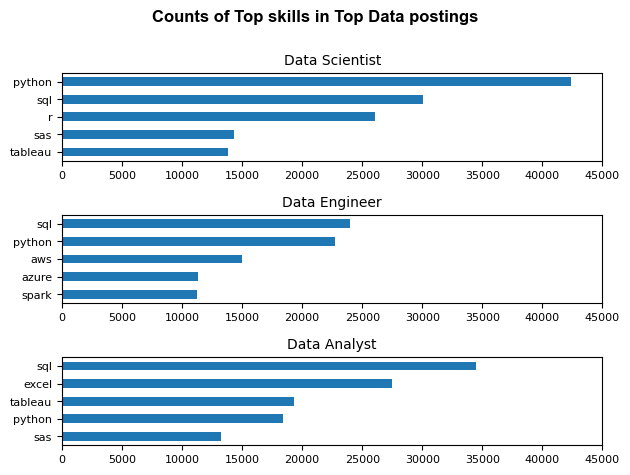

In [117]:
# Let's plot charts to show the top skills for each top job we recognized

fig , ax = plt.subplots(len(top_jobs),1)

for i,job in enumerate(top_jobs):
    df_plot =df_skills_per_job[df_skills_per_job['job_title_short']==job].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job,fontsize=8) 
    ax[i].set_title(job, fontsize=10) 
    ax[i].set_xlim(0,45000)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.tight_layout(rect=[0, 0, 1, 0.92])
fig.suptitle('Counts of Top skills in Top Data postings',fontsize=12,fontweight='bold',fontname='Arial')    
plt.show()

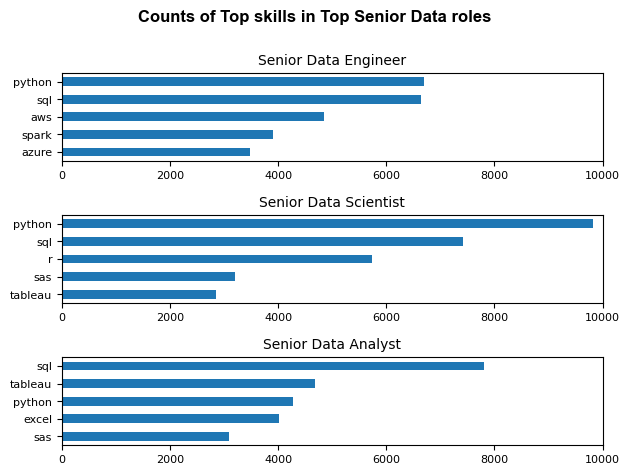

In [118]:
top_senior_roles = df_skills_per_job['job_title_short'].value_counts().tail(3).index.to_list()

# Let's plot charts to show the top skills for each top job we recognized

fig , ax = plt.subplots(len(top_senior_roles),1)

for i,job in enumerate(top_senior_roles):
    df_plot =df_skills_per_job[df_skills_per_job['job_title_short']==job].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job,fontsize=8) 
    ax[i].set_title(job, fontsize=10) 
    ax[i].set_xlim(0,10000)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.tight_layout(rect=[0, 0, 1, 0.92])
fig.suptitle('Counts of Top skills in Top Senior Data roles',fontsize=12,fontweight='bold',fontname='Arial')    
plt.show()



In [147]:
df_jobs = df_US_datajobs['job_title_short'].value_counts()

df_jobs = df_jobs.reset_index(name='job_counts')


In [148]:
df_jobs

,job_title_short,job_counts
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289


In [149]:
df_merged = df_skills_per_job.merge(df_jobs,on='job_title_short', how='left')
df_merged

,job_skills,job_title_short,skill_count,job_counts
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1223,xamarin,Data Analyst,1,67816
1224,wsl,Senior Data Engineer,1,9289
1225,wrike,Data Scientist,1,58830
1226,wrike,Data Engineer,1,35080


In [150]:
df_merged['pct_of_skills'] = 100*(df_merged['skill_count']/df_merged['job_counts'])
df_merged

,job_skills,job_title_short,skill_count,job_counts,pct_of_skills
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1223,xamarin,Data Analyst,1,67816,0.001475
1224,wsl,Senior Data Engineer,1,9289,0.010765
1225,wrike,Data Scientist,1,58830,0.001700
1226,wrike,Data Engineer,1,35080,0.002851


In [111]:
jobs_in_data=['Data Analyst','Data Engineer','Data Scientist']

In [151]:
df_merged = df_merged[df_merged['job_title_short'].isin(jobs_in_data)]



In [152]:
df_merged

,job_skills,job_title_short,skill_count,job_counts,pct_of_skills
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1222,nuix,Data Scientist,1,58830,0.001700
1223,xamarin,Data Analyst,1,67816,0.001475
1225,wrike,Data Scientist,1,58830,0.001700
1226,wrike,Data Engineer,1,35080,0.002851


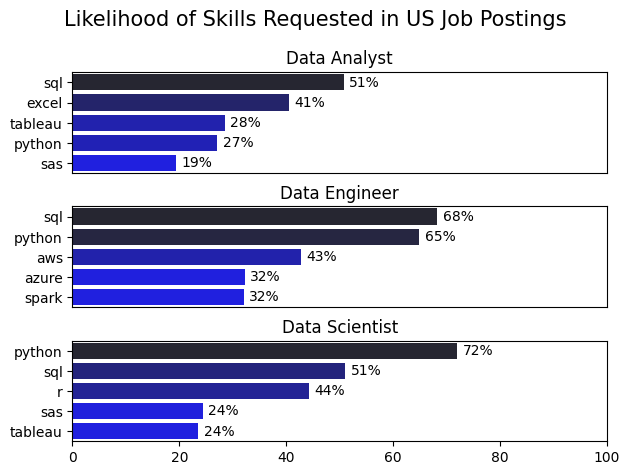

In [156]:
# plot graphs for above

fig , ax = plt.subplots((len(jobs_in_data)),1)

for i,job in enumerate(jobs_in_data):
    df_plot = df_merged[df_merged['job_title_short']==job].head(5)
    sns.barplot(data = df_plot,x='pct_of_skills',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r' )
    ax[i].set_title(job)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 100)
    # remove the x-axis tick labels for better readability
    if i != len(jobs_in_data) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['pct_of_skills']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()